<a href="https://colab.research.google.com/github/vitorkol/cholesterol-risk-group-challenge/blob/master/grupo_de_risco_colesterol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação das blibliotecas a serem utilizadas**

In [1]:
import pandas as pd

**Coleta dos dados**


Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes.

In [2]:
url = "https://raw.githubusercontent.com/vitorkol/cholesterol-risk-group-challenge/master/dataset/estados_brasileiros.csv"
estados = pd.read_csv(url, sep = ';', encoding = 'latin-1')

In [51]:
url = "https://raw.githubusercontent.com/vitorkol/cholesterol-risk-group-challenge/master/dataset/dados_clientes.xlsx"
clientes = pd.read_excel(url)

In [4]:
url = "https://raw.githubusercontent.com/vitorkol/cholesterol-risk-group-challenge/master/dataset/idade_clientes.csv"
idades = pd.read_csv(url,sep = ';',encoding = 'latin-1')

**Normalização da base de dados**

Está é uma etapa minuciosa, porque é nela que realizamos a transformação dos dados, ou seja, onde eles são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

In [5]:
#Substituindo os valores nulos de país por Brasil
#estados.pais.fillna('Brasil', inplace = True)

In [6]:
#removendo dados ausentes
estados.dropna(subset=['pais'], inplace=True) 

In [7]:
#Formatando as siglas dos estados como caixa alta
estados['sigla_estado'] = estados.sigla_estado.str.upper()

In [54]:
#Limpando dados vazios conforme solicitado na descrição do desafio, removendo as linhas de peso = nulo
clientes.dropna(subset=['peso'], inplace=True) 

**Substituindo valores nulos pela média / mediana**

In [52]:
media = clientes.colesterol.mean()

In [10]:
mediana = clientes.peso.median()

In [53]:
round(media,2)

170.43

In [12]:
#Caso a análise solicite que os dados nulos não sejam removidos, descomentar a linha abaixo
#clientes.peso.fillna(round(media,2), inplace=True)

--------------------- **Fim da substituição de valores** ---------------------

In [55]:
#Analisando as variáveis da base de dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  542 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  542 non-null    int64  
 3   genero      542 non-null    object 
 4   id_estado   542 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 25.4+ KB


In [14]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [15]:
# Verificando valores ausentes/nulos na base
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
# Verificando valores ausentes/nulos na base
idades.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [17]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado


**Analisando a distribuição dos dados**

In [18]:
#Importando as bibliotecas necessárias
import matplotlib.pyplot as plt #Essa biblioteca é utilizada para criar visualizações estáticas, animadas e interativas
from sklearn.preprocessing import LabelEncoder #Essa bliblioteca é usada para criar um Identificador único para uma variável

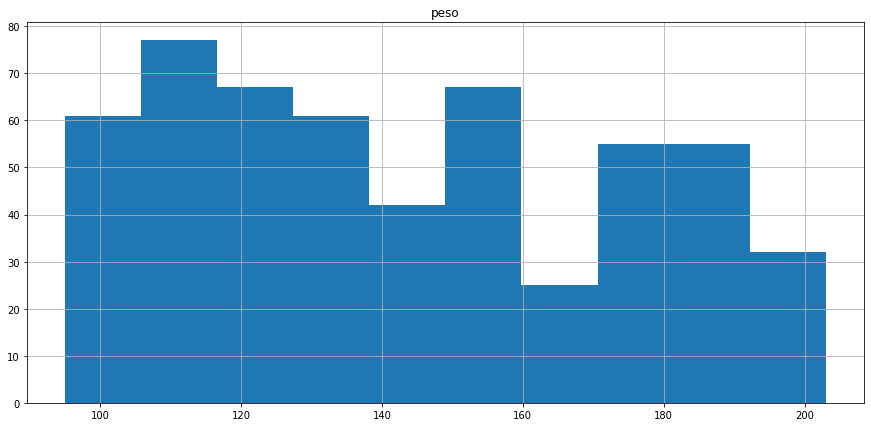

In [19]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

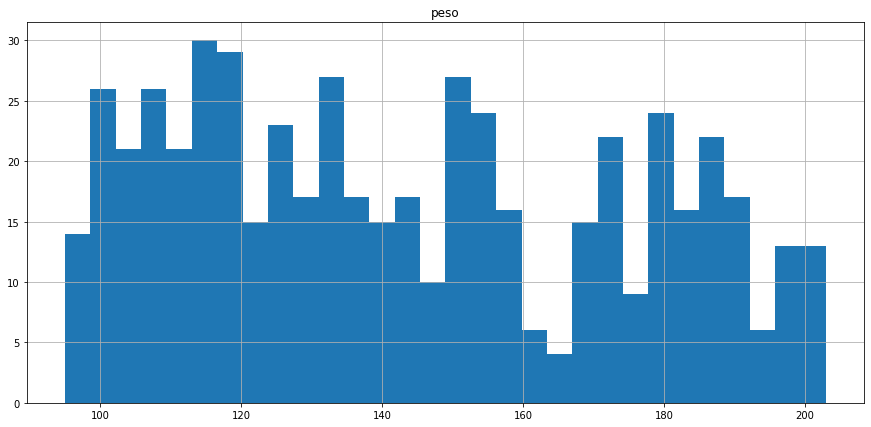

In [20]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

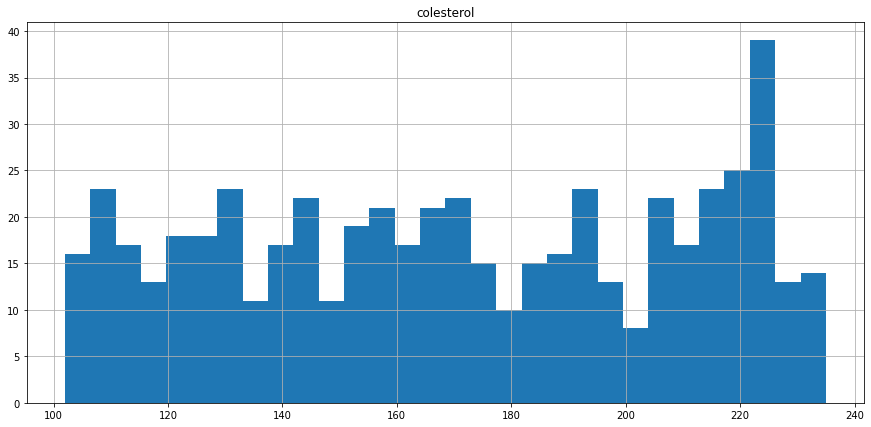

In [21]:
clientes.hist(column='colesterol', figsize=(15,7), bins=30)
plt.show()

In [22]:
#Criando nova coluna do tipo enum trantando como identificador de genero
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

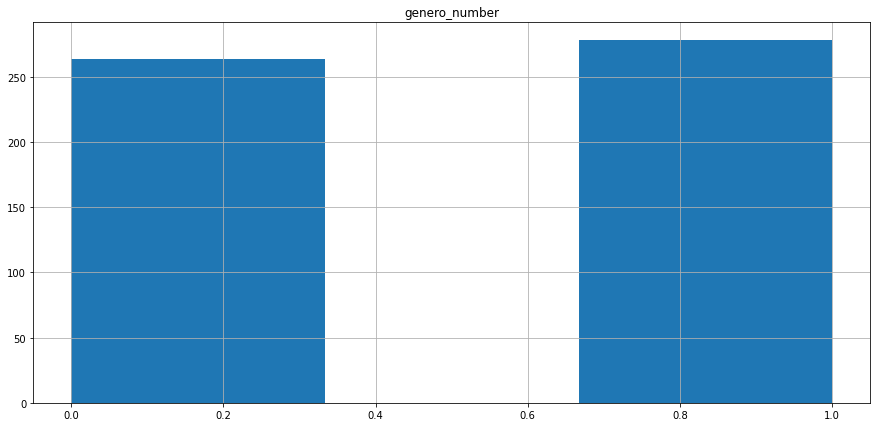

In [23]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3 )
plt.show()

**Realizando o JOIN entre os dados coletados**

In [24]:
#Fazendo o merge de estado com clientes
cliente_por_estado = pd.merge(clientes, estados, on = 'id_estado')
cliente_por_estado.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil


In [25]:
#criando a base única de dados através do merge entre idades e clientes_por_estado
base_dataset = pd.merge(cliente_por_estado, idades, on='id_cliente').sort_values('id_cliente')

In [26]:
#Refazendo index da base_dataset
base_dataset.reset_index(drop = True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


In [27]:
#Renomeando colunas para melhor entendimento dos dados
base_dataset.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)

In [28]:
#Escolhendo as colunas que serão trabalhadas neste exercício
base_dataset = base_dataset[['cod_cliente','genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

In [29]:
#Alterando tipo de dados colesterol de int64 para float
base_dataset['colesterol'] = base_dataset['colesterol'].astype('float')

In [30]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_cliente   498 non-null    int64  
 1   genero        498 non-null    object 
 2   idade         498 non-null    int64  
 3   peso          498 non-null    float64
 4   colesterol    498 non-null    float64
 5   id_estado     498 non-null    int64  
 6   estado        498 non-null    object 
 7   sigla_estado  498 non-null    object 
 8   pais          498 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.1+ KB


**Normalizar dados discrepantes na base_dataset**

Não foi necessário realizar a normalização da base de dados, devido a quantidade de registros. Todavia essa é uma boa prática!

**Usando dados não normalizados com o StanderScalar** 

In [31]:
dados_clientes = base_dataset[['peso', 'colesterol']]

In [32]:
dados_clientes

,peso,colesterol
0,102.0,111.0
1,115.0,135.0
2,115.0,136.0
3,130.0,158.0
4,198.0,227.0
...,...,...
493,172.0,207.0
494,129.0,157.0
495,107.0,115.0
496,117.0,147.0


**Aplicando método do cotovelo**

Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [33]:
#Importando as bibliotecas necessárias
from sklearn.cluster import KMeans #Prepara o ambiente para o processamento de um ou mais notebooks para realizar o supervionamento não monitorado pelo KMeans
import plotly.express as px #Essa biblioteca pertimite que seja criado gráficos dinâmicos
import plotly.graph_objects as go #Essa biblioteca permite que seja criado e concatenados gráficos de diferentes tipos
import plotly.offline as py #Essa biblioteca é utilizada para renderizar imagens

In [34]:
#Criando a função para calcular o wcss
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [35]:
#Calculando o valor do wcss (Within-Cluster Sum of Squares)
wcss_clientes = calcular_wcss(dados_clientes)

In [36]:
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1248240.6686746986
O cluster 1 possui valor de WCSS de: 298932.7377352369
O cluster 2 possui valor de WCSS de: 127842.60787249672
O cluster 3 possui valor de WCSS de: 73809.93553059456
O cluster 4 possui valor de WCSS de: 49068.8738718445
O cluster 5 possui valor de WCSS de: 34064.50002100837
O cluster 6 possui valor de WCSS de: 25079.92393550797
O cluster 7 possui valor de WCSS de: 20378.05126656164
O cluster 8 possui valor de WCSS de: 16003.657266380145
O cluster 9 possui valor de WCSS de: 13385.38391038145


In [37]:
#Visualizando o gráfico do cotovelo
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()

In [38]:
#Definindo o número de clusters após análise do gráfico de cotovelo.
kmeans_clientes = KMeans(n_clusters = 4, random_state=0)
base_dataset['cluster'] = kmeans_clientes.fit_predict(dados_clientes)

In [39]:
#Calculando os valores dos centroides de cada cluster
centroides_clusters = kmeans_clientes.cluster_centers_

In [40]:
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

**Criando Função para Gerar gráficos**

Metódo utilizado para não ter que ficar criando várias vezes a mesma linha de código, possibilitando somente alterar as variáveis (features)

In [41]:
def plotar_grafico(x,y, xlabel, y_label):
    grafico = px.scatter(
        x = x, 
        y = y,
        color= base_dataset['cluster']
    )
  
    fig = go.Figure(grafico)

    fig.update_layout(
        title='Análise de Clusters',
        xaxis_title= xlabel,
        yaxis_title= y_label,                  
    ) 
    fig.show()

In [42]:
x = 'colesterol'
y = 'peso'
plotar_grafico(base_dataset[x], base_dataset[y], x, y)

In [43]:
grafico =   px.scatter(
                x = base_dataset['peso'], 
                y = base_dataset['colesterol'],
                color= base_dataset['cluster']
            )
grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [44]:
cluster_clientes = base_dataset

**Segmentando os clientes baseado na análise dos clusters**

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 4 tipos:


- Alto risco: Peso e colesterol altos
- Risco Moderado Alto: peso e colesterol medianos
- Risco Moderado Baixo: peso e colesterol medianos
- Baixo risco: Baixo peso e colesterol baixo




In [45]:
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Risco Moderado Alto'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Baixo Risco'

In [46]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [47]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo Risco,129,25,Amazonas,10
Risco Moderado Alto,106,25,Pernambuco,7
Risco Moderado Baixo,121,25,Sergipe,9


In [48]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Rio Grande do Sul"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
63,69,Feminino,35,187.0,221.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
97,106,Masculino,56,179.0,216.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
235,261,Masculino,34,171.0,205.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
282,313,Masculino,33,169.0,204.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
304,335,Masculino,68,182.0,222.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
340,373,Feminino,38,194.0,224.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
341,374,Masculino,18,177.0,214.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
342,376,Masculino,50,172.0,205.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
365,403,Feminino,45,175.0,215.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
370,409,Masculino,19,180.0,219.0,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco


In [49]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado Alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado Baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

In [58]:
#Exporntando os dados para serem consumidos em outra ferramenta de visualização, por exemplo: Power BI, Tableau, Data Studio
#cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1') 